
# Karma Model: Hyperbolic Validation Experiments

This notebook contains four validation experiments for the Karma reputation model based on hyperbolic geometry.

- **Experiment 1:** Sensitivity to perturbations near the boundary of the Poincaré disk.
- **Experiment 2:** Geodesic representation of moral extremes (Altruist vs. Antagonist).
- **Experiment 3:** Contextual Distinction via Fiber Structure.
- **Experiment 4:** Stochastic Karma Drift Over Time

In [1]:

import numpy as np
import matplotlib.pyplot as plt

def distancia_hiperbolica(z1, z2):
    numerador = 2 * np.abs(z1 - z2)**2
    denominador = (1 - np.abs(z1)**2) * (1 - np.abs(z2)**2)
    return np.arccosh(1 + numerador / denominador)



## Experiment 1: Moral Sensitivity to Perturbations

We simulate a fixed Euclidean perturbation on agents at different radial distances from the center of the disk. According to the hyperbolic metric, identical displacements should have increasingly large impact near the boundary (|z| → 1).


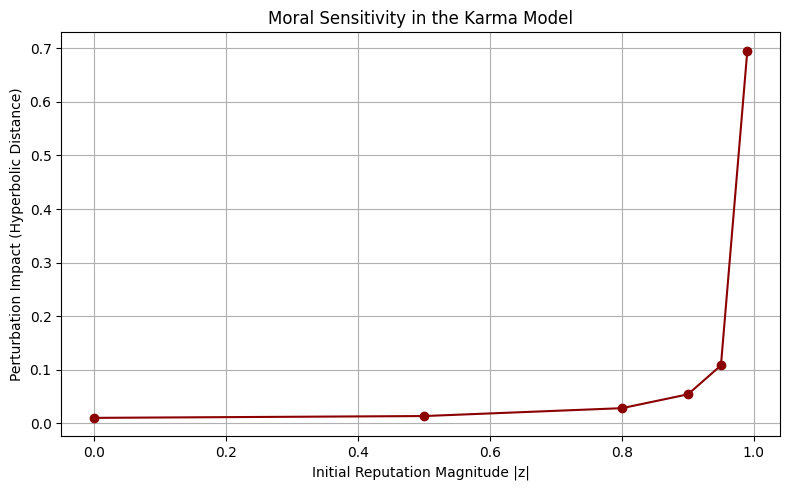

In [2]:

z_inicial = np.array([0.0, 0.5, 0.8, 0.9, 0.95, 0.99])
delta_z = 0.005
z_final = z_inicial + delta_z
impacto = distancia_hiperbolica(z_inicial, z_final)

plt.figure(figsize=(8, 5))
plt.plot(np.abs(z_inicial), impacto, 'o-', color='darkred')
plt.xlabel('Initial Reputation Magnitude |z|')
plt.ylabel('Perturbation Impact (Hyperbolic Distance)')
plt.title('Moral Sensitivity in the Karma Model')
plt.grid(True)
plt.tight_layout()
plt.show()



**Interpretation:**  
The hyperbolic metric amplifies small Euclidean perturbations as agents approach the boundary. This confirms the Karma model's hypothesis: highly consolidated reputations are inherently fragile.



## Experiment 2: Geodesic Between Moral Extremes

We visualize a geodesic between two agents with opposing reputational states: one altruistic, one antagonistic. In the Poincaré disk, if the points lie along the same diameter, the geodesic is a straight line segment.


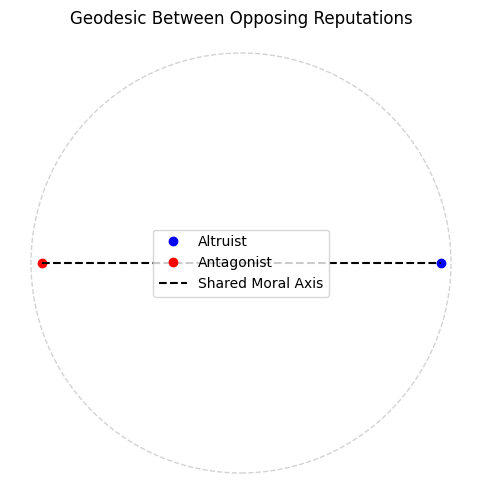

In [5]:

fig, ax = plt.subplots(figsize=(6, 6))
disco = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--')
ax.add_artist(disco)

z_altruista = 0.95
z_antagonista = -0.95

ax.plot(np.real(z_altruista), 0, 'bo', label='Altruist')
ax.plot(np.real(z_antagonista), 0, 'ro', label='Antagonist')

ax.plot([np.real(z_antagonista), np.real(z_altruista)], [0, 0],
        'k--', label='Shared Moral Axis')

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
ax.set_title('Geodesic Between Opposing Reputations')
ax.legend()
ax.grid(False)
ax.axis('off')
plt.show()



**Interpretation:**  
Despite being morally opposite, the two agents share a direct hyperbolic path. This represents a shared moral axis — allowing the model to represent paradoxical affinities between extreme reputational states.


## Experiment 3: Contextual Distinction via Fiber Structure

This experiment illustrates how different reputational contexts (fibers) can be associated with the same base point in the Poincaré disk. Although the karma magnitude and orientation are identical, their interpretations differ by context.

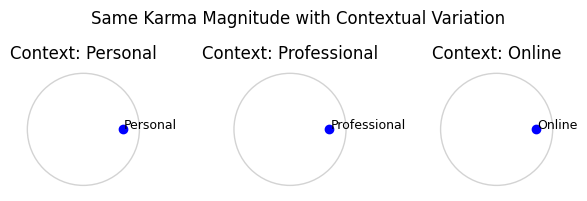

In [6]:
z_base = 0.7 + 0j
contexts = ['Personal', 'Professional', 'Online']

plt.figure(figsize=(6, 2))
for i, context in enumerate(contexts):
    plt.subplot(1, 3, i+1)
    circle = plt.Circle((0, 0), 1, color='lightgray', fill=False)
    plt.gca().add_patch(circle)
    plt.plot(np.real(z_base), np.imag(z_base), 'bo')
    plt.text(np.real(z_base)+0.02, np.imag(z_base), f'{context}', fontsize=9)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.gca().set_aspect('equal')
    plt.axis('off')
    plt.title(f'Context: {context}')

plt.suptitle('Same Karma Magnitude with Contextual Variation')
plt.tight_layout()
plt.show()

**Interpretation:**

All three agents share the same karma magnitude and orientation, but each exists in a distinct fiber — a unique reputational context. This demonstrates that similarity in moral profile does not guarantee mutual trust or compatibility.

## Experiment 4: Stochastic Karma Drift Over Time

This experiment simulates the evolution of a karma state under stochastic perturbations, following a simplified form of the Langevin equation described in the model.

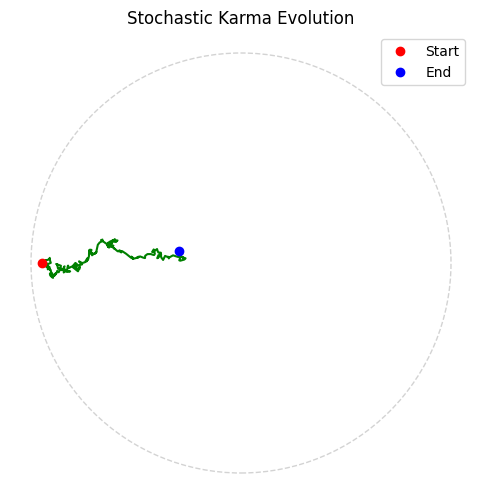

In [7]:
np.random.seed(42)
n_steps = 200
z = np.zeros(n_steps, dtype=complex)
z[0] = -0.95  # Starting near the antagonist side
rho = 0.01

for t in range(1, n_steps):
    noise = rho * (np.random.randn() + 1j * np.random.randn())
    drift = 0.002 * (0.95 - z[t-1])  # Drift toward altruist side (0.95)
    z[t] = z[t-1] + drift + noise
    if abs(z[t]) >= 1:
        z[t] = z[t-1]  # Reflect to stay within the disk

plt.figure(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='lightgray', fill=False, linestyle='--')
plt.gca().add_patch(circle)
plt.plot(z.real, z.imag, color='green')
plt.plot(z[0].real, z[0].imag, 'ro', label='Start')
plt.plot(z[-1].real, z[-1].imag, 'bo', label='End')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.gca().set_aspect('equal')
plt.title('Stochastic Karma Evolution')
plt.legend()
plt.axis('off')
plt.show()

**Interpretation:**

This trajectory shows how a karma state may shift over time due to both intentional drift and social randomness. It visually supports the dynamic nature of the model, allowing for moral change, recovery, or collapse within the disk's geometry.